## Andrew Ingrassia
## World Happiness Report
## Analyzing Time Series Data

***
### Contents

1. **Imports** <br><br>

2. **Combining Data** <br><br>

3. **Creating a line chart with the 'merged_data' dataframe** <br><br>

4. **Decomposition using the rolling mean method** <br><br>

5. **Stationarity of cluster data** <br><br>

6. **Checking autocorrelations** <br><br>

7. **Exports**

***
### 1) Imports

In [142]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf
import matplotlib.pyplot as plt
import statsmodels.api as sm
import plotly.express as px
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib
import warnings
import json
import os

warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')

In [87]:
# Defines a path to WHR related data

path = r'C:\Users\ingra\OneDrive\Desktop\Data Analysis\World Happiness Report\WHR - Data'

In [88]:
# Imports unstandardized WHR data

df = pd.read_csv(os.path.join(path, 'whr_df_whr2.csv'))

In [89]:
# Imports the 'df_clusters' dataframe created at the end of WHR5
# Contains each country/year combination's cluster assignment along with each cluster's avg happiness score per year

df_clusters = pd.read_csv(os.path.join(path, 'df_clusters_whr5.csv'))

In [90]:
# Imports the 'standardized_df' dataframe

standardized_df_modified = pd.read_csv(os.path.join(path, 'standardized_df_modified_whr5.csv'))

In [91]:
df_clusters.head()

,cluster,country,year,avg_happiness_score
0,1,Switzerland,2015,6.93916
1,1,Iceland,2015,6.93916
2,1,Denmark,2015,6.93916
3,1,Norway,2015,6.93916
4,1,Canada,2015,6.93916


***
### 2) Combining data

In [92]:
df.head()

,country,year,happiness_rank,happiness_score,economic_status,economic_status_class,life_expectancy,life_expectancy_class,social_support,social_support_class,freedom,freedom_class,govt_trust,govt_trust_class,generosity,generosity_class
0,Switzerland,2015,1,7.587,1.397,Mid,0.941,High,1.350,High,0.666,High,0.420,Mid,0.297,Mid
1,Iceland,2015,2,7.561,1.302,Mid,0.948,High,1.402,High,0.629,High,0.141,Low,0.436,Mid
2,Denmark,2015,3,7.527,1.325,Mid,0.875,High,1.361,High,0.649,High,0.484,Mid,0.341,Mid
3,Norway,2015,4,7.522,1.459,Mid,0.885,High,1.331,High,0.670,High,0.365,Mid,0.347,Mid
4,Canada,2015,5,7.427,1.326,Mid,0.906,High,1.323,High,0.633,High,0.330,Mid,0.458,Mid


In [93]:
# Creates a subset of 'df' with the 'year' and 'happiness_score' columns
df_subset = df[['year', 'country', 'happiness_score']]

In [94]:
df_subset.head()

,year,country,happiness_score
0,2015,Switzerland,7.587
1,2015,Iceland,7.561
2,2015,Denmark,7.527
3,2015,Norway,7.522
4,2015,Canada,7.427


In [95]:
df_clusters.head()

,cluster,country,year,avg_happiness_score
0,1,Switzerland,2015,6.93916
1,1,Iceland,2015,6.93916
2,1,Denmark,2015,6.93916
3,1,Norway,2015,6.93916
4,1,Canada,2015,6.93916


In [96]:
standardized_df_modified.head()

,happiness_score,freedom,govt_trust,economic_status,social_support,life_expectancy,generosity,country,year,cluster,avg_happiness_score
0,7.587,1.369377,2.591840,0.771454,0.876988,1.403226,0.917269,Switzerland,2015,1,6.93916
1,7.561,1.121938,0.110590,0.553005,1.038996,1.432864,2.151032,Iceland,2015,1,6.93916
2,7.527,1.255689,3.161015,0.605892,0.911259,1.123779,1.307812,Denmark,2015,1,6.93916
3,7.522,1.396127,2.102704,0.914020,0.817792,1.166120,1.361068,Norway,2015,1,6.93916
4,7.427,1.148688,1.791437,0.608192,0.792868,1.255035,2.346303,Canada,2015,1,6.93916


In [97]:
# Merges 'df_subset' with 'df_clusters' to get cluster assignments and country names
merged_data = df_subset.merge(df_clusters[['country', 'year', 'cluster']], on=['country', 'year'], how='left')

In [98]:
# Columns to be added from standardized_df_modified
columns_to_add = ['avg_happiness_score', 'freedom', 'govt_trust', 'economic_status', 'social_support', 'life_expectancy', 'generosity']

# Merge the dataframes based on 'country' and 'year'
merged_data = merged_data.merge(standardized_df_modified[['country', 'year'] + columns_to_add], on=['country', 'year'], how='left')

In [99]:
# Reorders the columns

desired_column_order = ['year', 'country', 'happiness_score', 'cluster', 'avg_happiness_score', 'freedom', 'govt_trust', 'economic_status', 'social_support', 'life_expectancy', 'generosity']
merged_data = merged_data[desired_column_order]

In [100]:
# Renames the 'avg_happiness_score' column

merged_data.rename(columns={'avg_happiness_score': 'avg_cluster_happiness_score'}, inplace=True)

In [101]:
# Creates a MultiIndex using 'year' and 'country'
multi_index = pd.MultiIndex.from_frame(merged_data[['year', 'country']])

# Sets the MultiIndex as the new index
merged_data.set_index(multi_index, inplace=True)

# Drops the 'year' and 'country' columns from the DataFrame
merged_data.drop(columns=['year', 'country'], inplace=True)

In [102]:
merged_data.head()

happiness_score  cluster  avg_cluster_happiness_score  \
year country                                                              
2015 Switzerland            7.587        1                      6.93916   
     Iceland                7.561        1                      6.93916   
     Denmark                7.527        1                      6.93916   
     Norway                 7.522        1                      6.93916   
     Canada                 7.427        1                      6.93916   

                   freedom  govt_trust  economic_status  social_support  \
year country                                                              
2015 Switzerland  1.369377    2.591840         0.771454        0.876988   
     Iceland      1.121938    0.110590         0.553005        1.038996   
     Denmark      1.255689    3.161015         0.605892        0.911259   
     Norway       1.396127    2.102704         0.914020        0.817792   
     Canada       1.148688    1.791437         0.608192        0.792868   

                  life_expectancy  generosity  
year country                                   
2015 Switzerland         1.403226    0.917269  
     Iceland             1.432864    2.151032  
     Denmark             1.123779    1.307812  
     Norway              1.166120    1.361068  
     Canada              1.255035    2.346303

***
### 3) Creating a line chart with the 'merged_data' dataframe

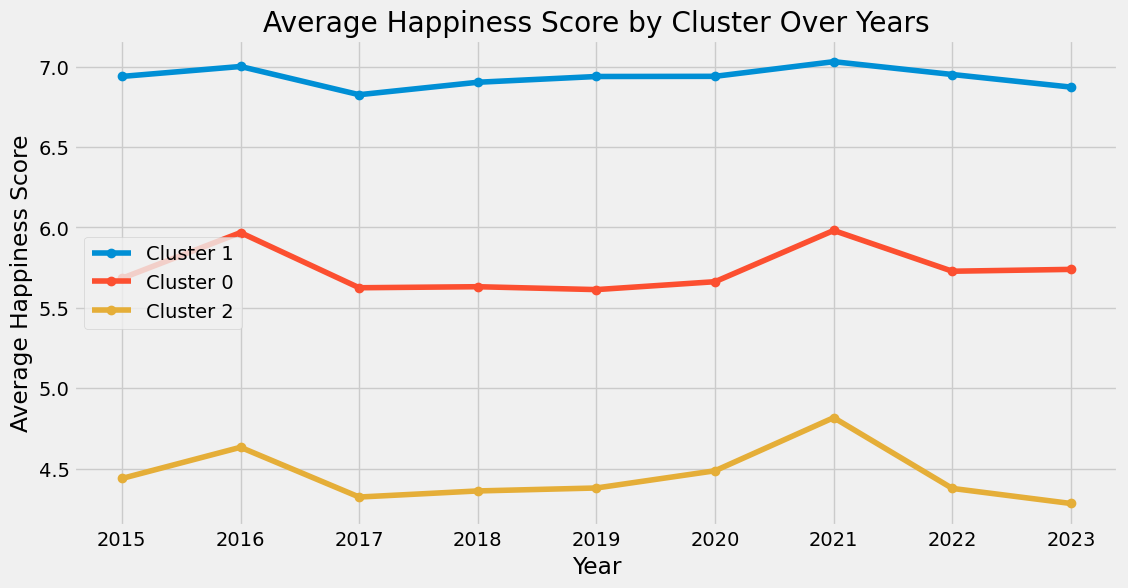

In [103]:
# Group the data by cluster and year, and calculate the mean happiness score for each cluster-year combination
mean_happiness_by_cluster_year = merged_data.groupby(['cluster', 'year'])['happiness_score'].mean()

# Plotting
clusters = merged_data['cluster'].unique()
plt.figure(figsize=(12, 6))

for cluster in clusters:
    cluster_data = mean_happiness_by_cluster_year.loc[cluster]
    plt.plot(cluster_data.index, cluster_data.values, marker='o', linestyle='-', label=f'Cluster {cluster}')

plt.title('Average Happiness Score by Cluster Over Years')
plt.xlabel('Year')
plt.ylabel('Average Happiness Score')
plt.legend()
plt.grid(True)
plt.show()

**Interpretation**

The consistent patterns observed across all three clusters in the line chart reveal shared trends in happiness scores among different groups of countries. Peaks in 2016 and 2021, as well as dips in 2017, suggest global or regional influences impacting well-being. These synchronized shifts prompt questions about the common factors driving these trends, whether they are related to significant events, policy changes, or broader societal dynamics. Further investigation into these patterns could yield valuable insights into the drivers of happiness fluctuations across clusters of countries.

#### *Modifying and exporting the 'mean_happiness_by_cluster_year' dataframe for use in Tableau*

In [104]:
mean_happiness_by_cluster_year = mean_happiness_by_cluster_year.to_frame()

In [105]:
mean_happiness_by_cluster_year = mean_happiness_by_cluster_year.reset_index()

In [106]:
mean_happiness_by_cluster_year.rename(columns={'happiness_score': 'avg_happiness_score'}, inplace=True)

In [107]:
mean_happiness_by_cluster_year.head()

,cluster,year,avg_happiness_score
0,0,2015,5.683362
1,0,2016,5.967767
2,0,2017,5.624652
3,0,2018,5.631145
4,0,2019,5.613157


In [108]:
# Exports the modified 'mean_happiness_by_cluster_year' dataframe

# mean_happiness_by_cluster_year.to_csv(r'C:\Users\ingra\OneDrive\Desktop\mean_happiness_by_cluster_year_whr6.csv', index=False)

***
### 4) Decomposition using the rolling mean method

In [109]:
merged_data.head()

happiness_score  cluster  avg_cluster_happiness_score  \
year country                                                              
2015 Switzerland            7.587        1                      6.93916   
     Iceland                7.561        1                      6.93916   
     Denmark                7.527        1                      6.93916   
     Norway                 7.522        1                      6.93916   
     Canada                 7.427        1                      6.93916   

                   freedom  govt_trust  economic_status  social_support  \
year country                                                              
2015 Switzerland  1.369377    2.591840         0.771454        0.876988   
     Iceland      1.121938    0.110590         0.553005        1.038996   
     Denmark      1.255689    3.161015         0.605892        0.911259   
     Norway       1.396127    2.102704         0.914020        0.817792   
     Canada       1.148688    1.791437         0.608192        0.792868   

                  life_expectancy  generosity  
year country                                   
2015 Switzerland         1.403226    0.917269  
     Iceland             1.432864    2.151032  
     Denmark             1.123779    1.307812  
     Norway              1.166120    1.361068  
     Canada              1.255035    2.346303

**Note:** *I opted for a rolling mean method instead of focusing on seasonality because the World Happiness Report data does not exhibit a prominent seasonal pattern. By using the rolling mean, I hope to capture the underlying trend in the data over time, allowing me to identify shifts and fluctuations in happiness scores that were not driven by seasonal variations.*

In [110]:
# Sets the rolling window size
window_size = 3

# Calculates the rolling mean for the 'happiness_score' column using the .rolling() method
rolling_mean = merged_data['happiness_score'].rolling(window=window_size).mean()

In [111]:
# Creates a new dataframe that combines the 'happiness_score' and the calculated rolling mean
rolling_data = pd.DataFrame({
    'happiness_score': merged_data['happiness_score'],
    'rolling_mean': rolling_mean
})

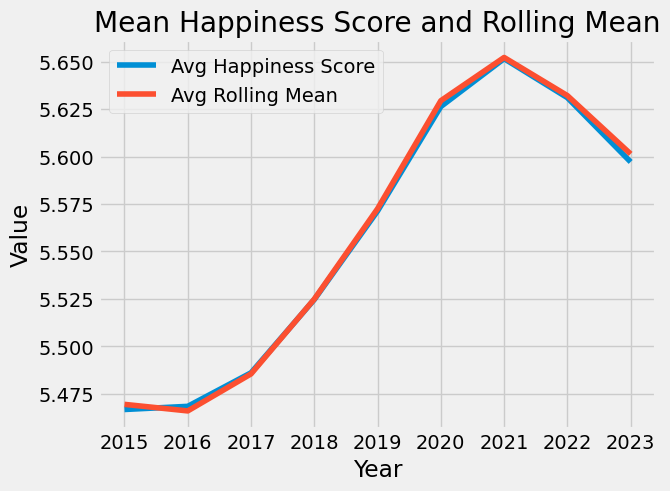

In [112]:
# Calculates the mean happiness score and rolling mean for each year
yearly_aggregated = rolling_data.groupby(level='year').mean()

# Plots the aggregated values
plt.plot(yearly_aggregated.index, yearly_aggregated['happiness_score'], label='Avg Happiness Score')
plt.plot(yearly_aggregated.index, yearly_aggregated['rolling_mean'], label='Avg Rolling Mean')
plt.xlabel('Year')
plt.ylabel('Value')
plt.title('Mean Happiness Score and Rolling Mean')
plt.legend()
plt.grid(True)
plt.show()

**Plot Elements**

- **Happiness Score Line:** *The blue line represents the mean happiness score across all countries. Each point on the line corresponds to a specific year, and the vertical position of the point represents the happiness score for that year. The values on the y-axis indicate the range of happiness scores.* <br><br>

- **Rolling Mean Line:** *The red line represents the rolling mean of the happiness scores. This rolling mean is calculated using a window of previous years (e.g., a 3-year window) and provides a smoothed trend of the happiness scores. It helps to filter out short-term fluctuations and highlight longer-term trends in the data.* <br><br>

- **X-Axis (Year):** *The x-axis represents the years for which data is available. Each tick on the x-axis corresponds to a specific year, and you'll notice that there is one point for each year on both the happiness score and rolling mean lines.* <br><br>

- **Y-Axis (Value):** *The y-axis represents the values of the happiness scores and rolling mean. The values are scaled based on the range of happiness scores in the data. The actual values of the happiness scores are shown on the y-axis.*

**Interpretation**

- **Consistent Trend:** *The fact that the two lines are almost perfectly overlapping suggests a consistent and stable trend in both the actual happiness scores and the rolling mean across the years.* <br><br>

- **Alignment of Peaks and Valleys:** *The points where both lines share almost identical values indicate years where the happiness scores and the rolling mean experience similar peaks and valleys. This alignment suggests that the rolling mean effectively captures the general trend and fluctuations present in the actual happiness scores.* <br><br>

- **Stable Long-Term Trend:** *The consistency in alignment over several years (2015 to 2023) indicates that the underlying long-term trend in happiness scores is relatively stable. This could be due to consistent external factors influencing happiness or other societal trends that remain constant.* <br><br>

- **Resilience to Short-Term Fluctuations:** *The rolling mean smooths out short-term fluctuations and noise in the happiness scores, focusing on the broader trend. The fact that the alignment is consistent across multiple years suggests that the rolling mean is effectively filtering out short-term variations.* <br><br>


The rolling mean closely follows the actual happiness scores in the World Happiness Report data, indicating that it accurately represents the long-term trend in happiness. This suggests that the rolling mean is a dependable tool for spotting and comprehending shifts in well-being over time. Even though the dataset doesn't show a clear seasonal pattern (hence my need to use, the strong agreement between the rolling mean and the happiness scores underscores the rolling mean's effectiveness in showing how happiness trends change over the years.

***
### 5) Stationarity of cluster data

### *Cluster 0*

In [113]:
# Specifies the cluster number I want to stationarize
cluster_num_0 = 0

# Extracts data for cluster 0
cluster_data_0 = merged_data[merged_data['cluster'] == cluster_num_0]

# Calculates the first-order difference for the avg_cluster_happiness_score
cluster_data_0['diff_avg_cluster_happiness_score'] = cluster_data_0['avg_cluster_happiness_score'].diff()

# Displays the first few rows of the modified cluster data
cluster_data_0.head()

happiness_score  cluster  avg_cluster_happiness_score  \
year country                                                             
2015 Israel                7.278        0                     5.683362   
     Costa Rica            7.226        0                     5.683362   
     Mexico                7.187        0                     5.683362   
     Brazil                6.983        0                     5.683362   
     Venezuela             6.810        0                     5.683362   

                  freedom  govt_trust  economic_status  social_support  \
year country                                                             
2015 Israel     -0.322567   -0.449692         0.385144        0.484429   
     Costa Rica  1.155376   -0.200678        -0.242610        0.528047   
     Mexico      0.138872    0.750913        -0.093145       -0.478274   
     Brazil      0.192373    0.412965        -0.185123        0.512469   
     Venezuela  -0.215566   -0.156211        -0.040257        0.584126   

                 life_expectancy  generosity  diff_avg_cluster_happiness_score  
year country                                                                    
2015 Israel             1.288907    1.227928                               NaN  
     Costa Rica         1.060269    0.544477                               0.0  
     Mexico             0.865503   -0.467386                               0.0  
     Brazil             0.370121   -0.423006                               0.0  
     Venezuela          0.471738   -1.204093                               0.0

In [114]:
# Drops rows from 'cluster_data_0' containing null values

cluster_data_0 = cluster_data_0.dropna()

In [115]:
# Performs the Dickey-Fuller test on the differenced time series
diff_result_0 = adfuller(cluster_data_0['diff_avg_cluster_happiness_score'])

# Extracts the p-value from the result
diff_p_value_0 = diff_result_0[1]

if diff_p_value_0 <= 0.05:
    print(f"Cluster 0: Differenced time series is stationary (p-value = {diff_p_value_0})")
else:
    print(f"Cluster 0: Differenced time series is non-stationary (p-value = {diff_p_value_0})")

Cluster 0: Differenced time series is stationary (p-value = 0.0)


**Interpretation**

The result of the Dickey-Fuller test for Cluster 0 indicates that the differenced time series is stationary with a very low p-value of 0.0. In the context of the null hypothesis, a p-value less than or equal to the significance level (typically 0.05) suggests that we can reject the null hypothesis. This implies that the data has no unit root and is stationary, meaning it doesn't exhibit a significant trend or seasonality. Finding that the differenced time series is stationary for Cluster 0 suggests that the fluctuations in the average cluster happiness score are not driven by random noise, but rather by meaningful underlying patterns.

### *Cluster 1*

In [116]:
# Specifies the cluster number I want to stationarize
cluster_num_1 = 1

# Extracts data for cluster 1
cluster_data_1 = merged_data[merged_data['cluster'] == cluster_num_1]

# Calculates the first-order difference for the avg_cluster_happiness_score
cluster_data_1['diff_avg_cluster_happiness_score'] = cluster_data_1['avg_cluster_happiness_score'].diff()

# Displays the first few rows of the modified cluster data
cluster_data_1.head()

happiness_score  cluster  avg_cluster_happiness_score  \
year country                                                              
2015 Switzerland            7.587        1                      6.93916   
     Iceland                7.561        1                      6.93916   
     Denmark                7.527        1                      6.93916   
     Norway                 7.522        1                      6.93916   
     Canada                 7.427        1                      6.93916   

                   freedom  govt_trust  economic_status  social_support  \
year country                                                              
2015 Switzerland  1.369377    2.591840         0.771454        0.876988   
     Iceland      1.121938    0.110590         0.553005        1.038996   
     Denmark      1.255689    3.161015         0.605892        0.911259   
     Norway       1.396127    2.102704         0.914020        0.817792   
     Canada       1.148688    1.791437         0.608192        0.792868   

                  life_expectancy  generosity  \
year country                                    
2015 Switzerland         1.403226    0.917269   
     Iceland             1.432864    2.151032   
     Denmark             1.123779    1.307812   
     Norway              1.166120    1.361068   
     Canada              1.255035    2.346303   

                  diff_avg_cluster_happiness_score  
year country                                        
2015 Switzerland                               NaN  
     Iceland                                   0.0  
     Denmark                                   0.0  
     Norway                                    0.0  
     Canada                                    0.0

In [117]:
# Drops rows from 'cluster_data_1' containing null values

cluster_data_1 = cluster_data_1.dropna()

In [118]:
# Performs the Dickey-Fuller test on the differenced time series
diff_result_1 = adfuller(cluster_data_1['diff_avg_cluster_happiness_score'])

# Extracts the p-value from the result
diff_p_value_1 = diff_result_1[1]

if diff_p_value_1 <= 0.05:
    print(f"Cluster 1: Differenced time series is stationary (p-value = {diff_p_value_1})")
else:
    print(f"Cluster 1: Differenced time series is non-stationary (p-value = {diff_p_value_1})")

Cluster 1: Differenced time series is stationary (p-value = 9.974826402027483e-27)


**Interpretation**

The result of the Dickey-Fuller test for Cluster 1 indicates that the differenced time series is stationary with an extremely low p-value of approximately 9.97e-27. In the context of the null hypothesis, this p-value is far below the typical significance level of 0.05. Therefore, we can confidently reject the null hypothesis. This implies that the data has no unit root and is stationary, which means it lacks a significant trend or seasonality. The very small p-value strongly suggests that the fluctuations in the average cluster happiness score for Cluster 1 are not driven by random noise, but instead exhibit clear and meaningful patterns. The high level of confidence in the stationary nature of the time series supports the validity of employing time series analysis techniques on this data to uncover underlying insights and trends.

### *Cluster 2*

In [119]:
# Specifies the cluster number I want to stationarize
cluster_num_2 = 2

# Extracts data for cluster 2
cluster_data_2 = merged_data[merged_data['cluster'] == cluster_num_2]

# Calculates the first-order difference for the avg_cluster_happiness_score
cluster_data_2['diff_avg_cluster_happiness_score'] = cluster_data_2['avg_cluster_happiness_score'].diff()

# Displays the first few rows of the modified cluster data
cluster_data_2.head()

happiness_score  cluster  avg_cluster_happiness_score  \
year country                                                             
2015 Bolivia               5.890        2                     4.438292   
     Moldova               5.889        2                     4.438292   
     Kosovo                5.589        2                     4.438292   
     Indonesia             5.399        2                     4.438292   
     Kyrgyzstan            5.286        2                     4.438292   

                  freedom  govt_trust  economic_status  social_support  \
year country                                                             
2015 Bolivia     0.754124   -0.360758        -0.874963       -0.281995   
     Moldova    -0.891006   -1.001081        -1.075016       -0.166720   
     Kosovo     -1.432695   -0.725387        -0.599027       -0.799176   
     Indonesia   0.031872   -1.143375        -0.536941        0.057599   
     Kyrgyzstan -0.175441   -0.769853        -1.350952        0.256994   

                 life_expectancy  generosity  diff_avg_cluster_happiness_score  
year country                                                                    
2015 Bolivia           -0.298857    0.100677                               NaN  
     Moldova            0.035632    0.145057                               0.0  
     Kosovo             0.090674    0.793005                               0.0  
     Indonesia          0.120313    2.852235                               0.0  
     Kyrgyzstan         0.175355    0.943897                               0.0

In [120]:
# Drops rows from 'cluster_data_2' containing null values

cluster_data_2 = cluster_data_2.dropna()

In [121]:
# Performs the Dickey-Fuller test on the differenced time series
diff_result_2 = adfuller(cluster_data_2['diff_avg_cluster_happiness_score'])

# Extracts the p-value from the result
diff_p_value_2 = diff_result_2[1]

if diff_p_value_2 <= 0.05:
    print(f"Cluster 2: Differenced time series is stationary (p-value = {diff_p_value_2})")
else:
    print(f"Cluster 2: Differenced time series is non-stationary (p-value = {diff_p_value_2})")

Cluster 2: Differenced time series is stationary (p-value = 0.0)


**Interpretation**

The outcome of the Dickey-Fuller test for Cluster 2 reveals that the differenced time series is stationary, as evidenced by an obtained p-value of 0.0. This means that the null hypothesis can be rejected. Consequently, we can conclude that the data lacks a unit root and is indeed stationary. This suggests that the fluctuations observed in the average cluster happiness score for Cluster 2 are not a result of random noise, but rather exhibit meaningful and structured patterns. The exceptionally low p-value strongly supports the notion that the time series is devoid of a consistent trend or seasonality, which bolsters the validity of utilizing time series analysis methods to gain insights and detect significant trends in the data.

### *Concatenating stationarized data*

In [122]:
# Concatenates all 3 stationarized dataframes

merged_data_stationary = pd.concat([cluster_data_0, cluster_data_1, cluster_data_2], ignore_index=True)

In [123]:
merged_data_stationary.head()

,happiness_score,cluster,avg_cluster_happiness_score,freedom,govt_trust,economic_status,social_support,life_expectancy,generosity,diff_avg_cluster_happiness_score
0,7.226,0,5.683362,1.155376,-0.200678,-0.242610,0.528047,1.060269,0.544477,0.0
1,7.187,0,5.683362,0.138872,0.750913,-0.093145,-0.478274,0.865503,-0.467386,0.0
2,6.983,0,5.683362,0.192373,0.412965,-0.185123,0.512469,0.370121,-0.423006,0.0
3,6.810,0,5.683362,-0.215566,-0.156211,-0.040257,0.584126,0.471738,-1.204093,0.0
4,6.786,0,5.683362,0.540124,-0.316292,0.005732,0.403425,0.793525,0.446841,0.0


In [124]:
unique_values = merged_data_stationary['cluster'].unique()
print(unique_values)

[0 1 2]


In [125]:
merged_data_stationary.dtypes

happiness_score                     float64
cluster                               int64
avg_cluster_happiness_score         float64
freedom                             float64
govt_trust                          float64
economic_status                     float64
social_support                      float64
life_expectancy                     float64
generosity                          float64
diff_avg_cluster_happiness_score    float64
dtype: object

***
### 6) Checking autocorrelations

Cluster 0:


<Figure size 1000x400 with 0 Axes>

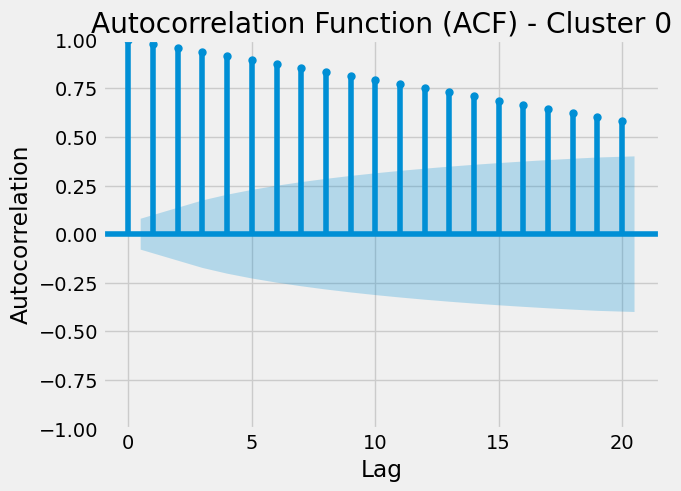

Cluster 1:


<Figure size 1000x400 with 0 Axes>

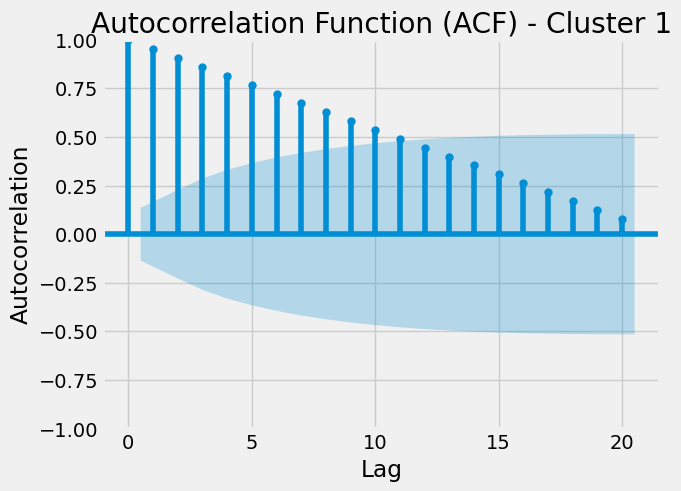

Cluster 2:


<Figure size 1000x400 with 0 Axes>

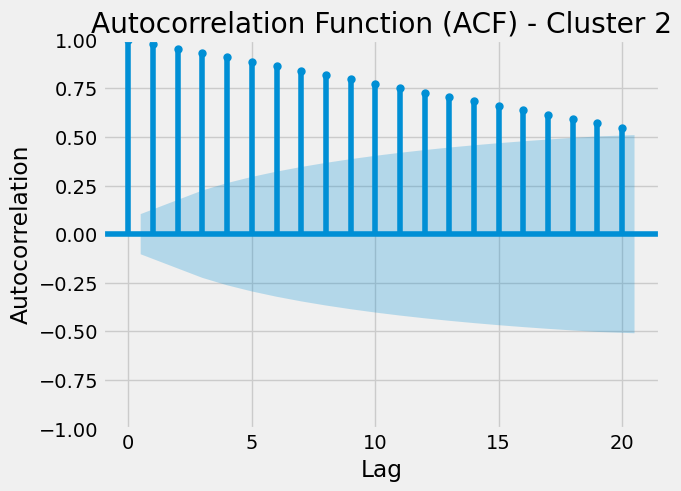

In [126]:
# Iterates through each cluster
for cluster in merged_data_stationary['cluster'].unique():
    print(f"Cluster {cluster}:")
    
    # Filters data for the current cluster
    cluster_data = merged_data_stationary[merged_data_stationary['cluster'] == cluster]['avg_cluster_happiness_score']
    
    # Plots the autocorrelation function (ACF)
    plt.figure(figsize=(10, 4))
    plot_acf(cluster_data, lags=20, alpha=0.05)
    plt.xlabel('Lag')
    plt.ylabel('Autocorrelation')
    plt.title(f'Autocorrelation Function (ACF) - Cluster {cluster}')
    plt.show()

**Note** 

The presence of significant autocorrelations in the ACF plots, even after stationarizing, suggests that there might be meaningful patterns or dependencies in the data that the differencing technique hasn't completely removed. This could be due to various factors inherent to the data itself.

In [148]:
# Create an empty list to store cluster-specific DataFrames
cluster_dfs = []

# Iterate through each cluster
for cluster in merged_data_stationary['cluster'].unique():
    print(f"Cluster {cluster}:")
    
    # Filters data for the current cluster
    cluster_data = merged_data_stationary[merged_data_stationary['cluster'] == cluster]['avg_cluster_happiness_score']
    
    # Calculate autocorrelation
    acf_result = acf(cluster_data, nlags=20)
    
    # Create a DataFrame for the current cluster's autocorrelation
    cluster_df = pd.DataFrame({
        'Cluster': [cluster] * len(acf_result),
        'Lag': range(len(acf_result)),
        'Autocorrelation': acf_result
    })
    
    # Append the cluster-specific DataFrame to the list
    cluster_dfs.append(cluster_df)

# Concatenate all cluster-specific DataFrames into one
cluster_autocorrelation_df = pd.concat(cluster_dfs, ignore_index=True)

Cluster 0:
Cluster 1:
Cluster 2:


In [150]:
autocorrelation_df.head(100)

,Cluster,Lag,Autocorrelation
0,0,0,1.000000
1,0,1,0.979166
2,0,2,0.958331
3,0,3,0.937497
4,0,4,0.916663
...,...,...,...
58,2,16,0.638093
59,2,17,0.615474
60,2,18,0.592855
61,2,19,0.570235


In [149]:
# Exports the 'autocorrelation_df' dataframe 

# autocorrelation_df.to_csv(r'C:\Users\ingra\OneDrive\Desktop\autocorrelation_df_csv_whr6.csv', index=False)